In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

# Khởi tạo dữ liệu

In [115]:
df = pd.read_csv('/content/drive/MyDrive/khdl/luxury_watches_processed.csv')
df.head()

,Brand,Model,Brand_encoded,Model_encoded,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter,Case Thickness,Band Width,Power Reserve,Dial Color,Crystal Material,Complication_Score,Price
0,Rolex,Submariner,10964.814815,9500.0,Stainless Steel,Steel,Automatic,300.0,40.0,13.00,20.0,48.0,Black,Sapphire,1,9500.0
1,Omega,Seamaster,5321.739130,5800.0,Titanium,Rubber,Automatic,600.0,43.5,14.47,21.0,60.0,Blue,Sapphire,1,5800.0
2,Tag Heuer,Carrera,3613.636364,4200.0,Stainless Steel,Leather,Automatic,100.0,41.0,13.00,20.0,42.0,White,Sapphire,3,4200.0
3,Breitling,Navitimer,4693.750000,7900.0,Stainless Steel,Steel,Automatic,30.0,43.0,14.25,22.0,70.0,Black,Sapphire,3,7900.0
4,Cartier,Tank Solo,6715.789474,2800.0,Stainless Steel,Leather,Quartz,30.0,31.0,6.05,20.0,55.0,Silver,Sapphire,0,2800.0


# Data Visualization

## Price Distribution by Crystal Material



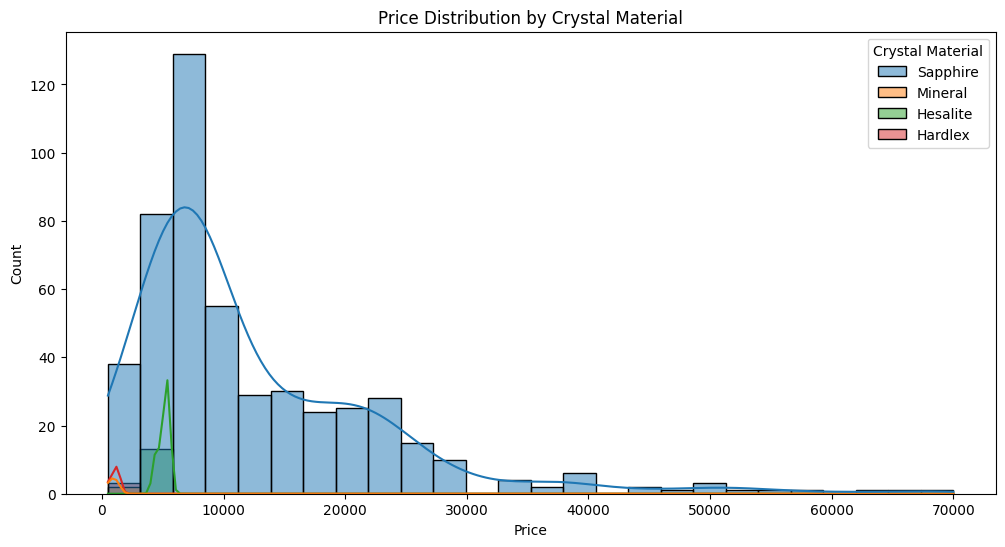

In [116]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Price', hue='Crystal Material', kde=True)
plt.title('Price Distribution by Crystal Material')
plt.xlabel('Price')
plt.show()

## Price Distribution by Brand

In [117]:
df[['Brand', 'Model']] = df[['Brand', 'Model']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Brand               507 non-null    category
 1   Model               507 non-null    category
 2   Brand_encoded       507 non-null    float64 
 3   Model_encoded       507 non-null    float64 
 4   Case Material       507 non-null    object  
 5   Strap Material      507 non-null    object  
 6   Movement Type       507 non-null    object  
 7   Water Resistance    507 non-null    float64 
 8   Case Diameter       507 non-null    float64 
 9   Case Thickness      507 non-null    float64 
 10  Band Width          507 non-null    float64 
 11  Power Reserve       507 non-null    float64 
 12  Dial Color          507 non-null    object  
 13  Crystal Material    507 non-null    object  
 14  Complication_Score  507 non-null    int64   
 15  Price               507 non-null    floa

In [118]:
df['Brand'].value_counts()

,count
Brand,
IWC,39
Audemars Piguet,38
Patek Philippe,33
Zenith,30
Blancpain,29
Rolex,27
Breguet,26
Hublot,26
Panerai,25


<ipython-input-119-06154497cab6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='Price', x='Brand_Grouped', data=df, palette='Set3')


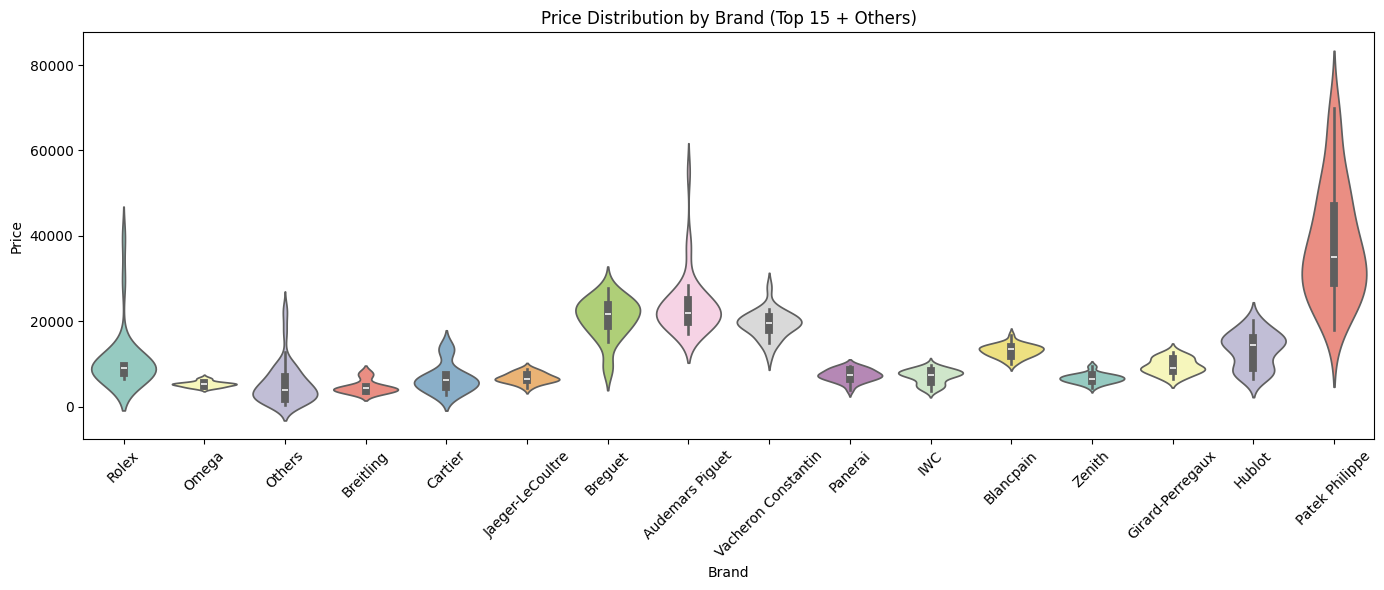

In [119]:
top_15_brands = df['Brand'].value_counts().nlargest(15).index

# 2. Tạo cột mới 'Brand_Grouped' gộp các brand khác thành 'Others'
df['Brand_Grouped'] = df['Brand'].apply(lambda x: x if x in top_15_brands else 'Others')

# 3. Vẽ biểu đồ boxplot
plt.figure(figsize=(14, 6))
sns.violinplot(y='Price', x='Brand_Grouped', data=df, palette='Set3')
plt.title('Price Distribution by Brand (Top 15 + Others)')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Boxplot of Price by Water Resistance

In [120]:
df['Water Resistance'].value_counts()

,count
Water Resistance,
100.0,130
50.0,112
30.0,104
300.0,63
200.0,29
120.0,26
150.0,20
60.0,13
1000.0,4


## Scatterplot of Price by Case Diameter

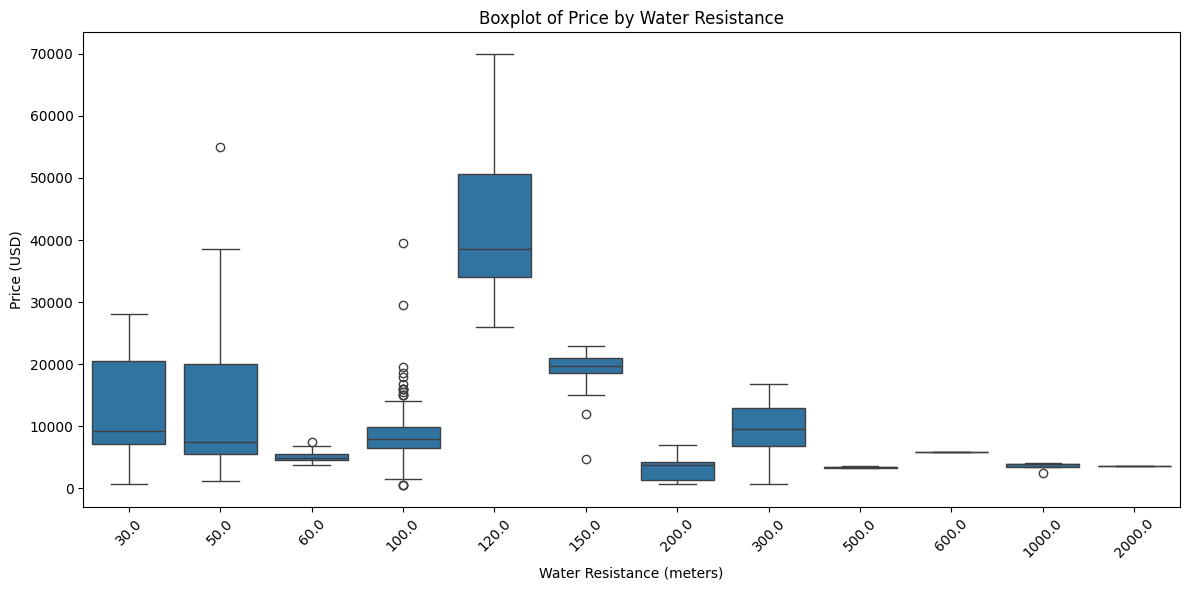

In [121]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='Water Resistance',
    y='Price'
)
plt.title('Boxplot of Price by Water Resistance')
plt.xlabel('Water Resistance (meters)')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


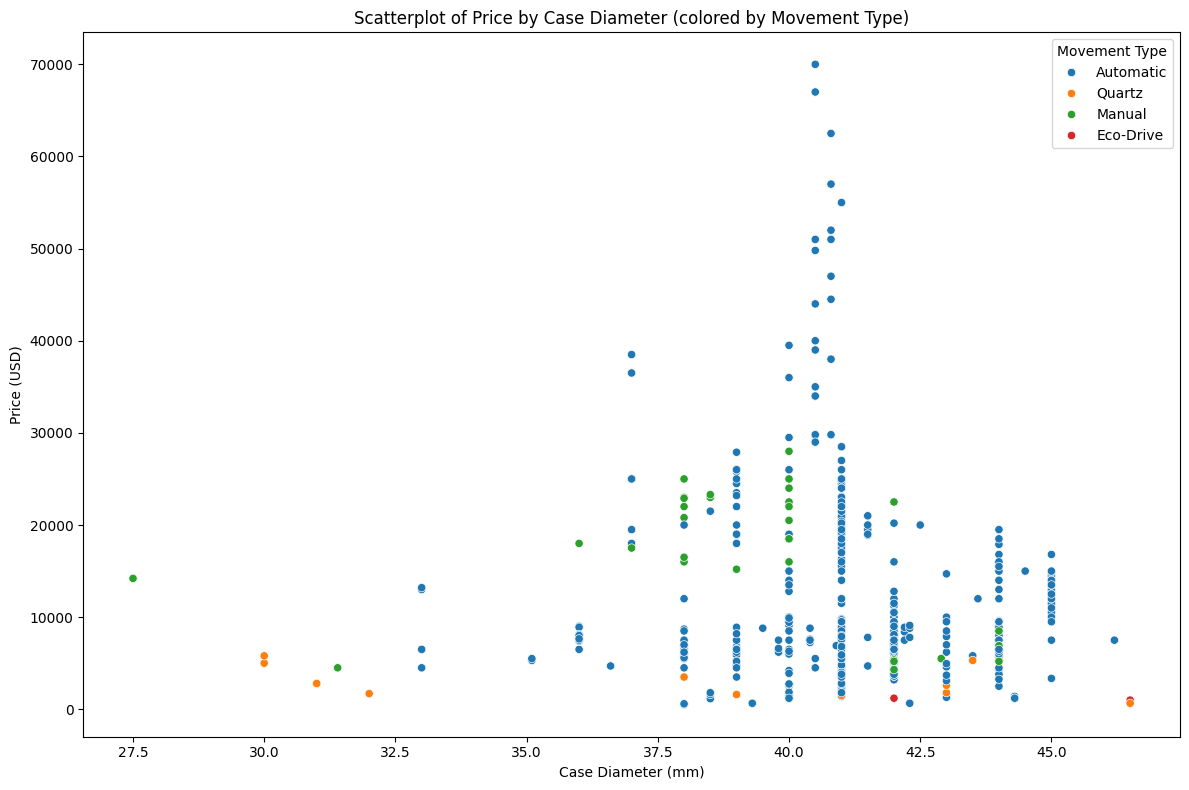

In [122]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Case Diameter', y='Price', hue='Movement Type', data=df)
plt.title('Scatterplot of Price by Case Diameter (colored by Movement Type)')
plt.xlabel('Case Diameter (mm)')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()


## 3D Scatter Plot: Diameter, Thickness, Price by Crystal Material

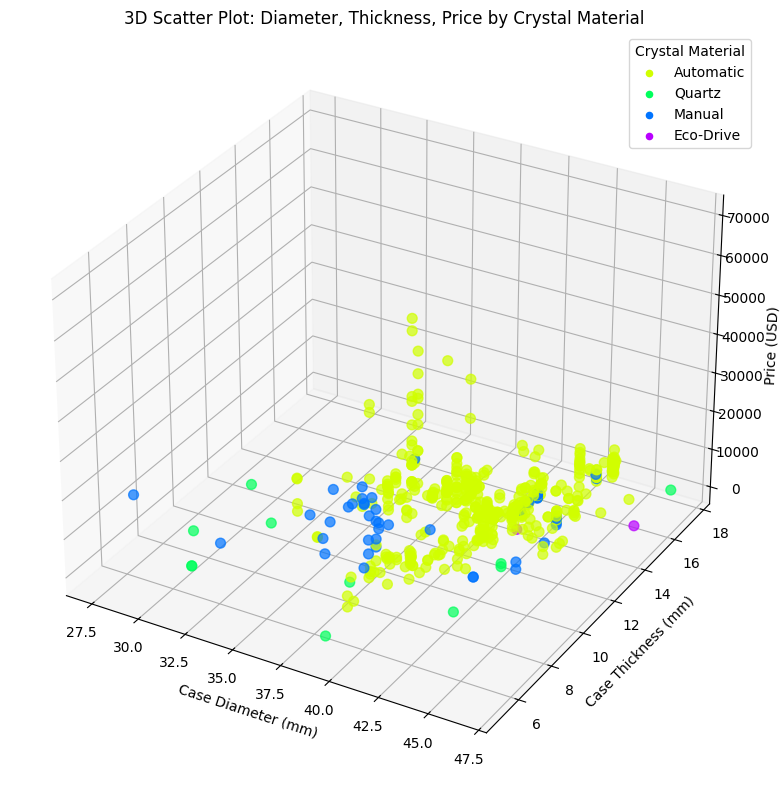

In [123]:
unique_materials = df['Movement Type'].unique()
material_colors = dict(zip(unique_materials, sns.color_palette("hsv", len(unique_materials))))
df['Color'] = df['Movement Type'].map(material_colors)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df['Case Diameter'],
    df['Case Thickness'],
    df['Price'],
    c=df['Color'],
    s=50,
    alpha=0.7
)

ax.set_xlabel('Case Diameter (mm)')
ax.set_ylabel('Case Thickness (mm)')
ax.set_zlabel('Price (USD)')
ax.set_title('3D Scatter Plot: Diameter, Thickness, Price by Crystal Material')

for material in unique_materials:
    ax.scatter([], [], [], c=[material_colors[material]], label=material)
ax.legend(title='Crystal Material')

plt.tight_layout()
plt.show()

In [124]:
df['Crystal Material'].value_counts()

,count
Crystal Material,
Sapphire,489
Hesalite,13
Hardlex,3
Mineral,2


## Correlation Heatmap

In [125]:
df.columns

Index(['Brand', 'Model', 'Brand_encoded', 'Model_encoded', 'Case Material',
       'Strap Material', 'Movement Type', 'Water Resistance', 'Case Diameter',
       'Case Thickness', 'Band Width', 'Power Reserve', 'Dial Color',
       'Crystal Material', 'Complication_Score', 'Price', 'Brand_Grouped',
       'Color'],
      dtype='object')

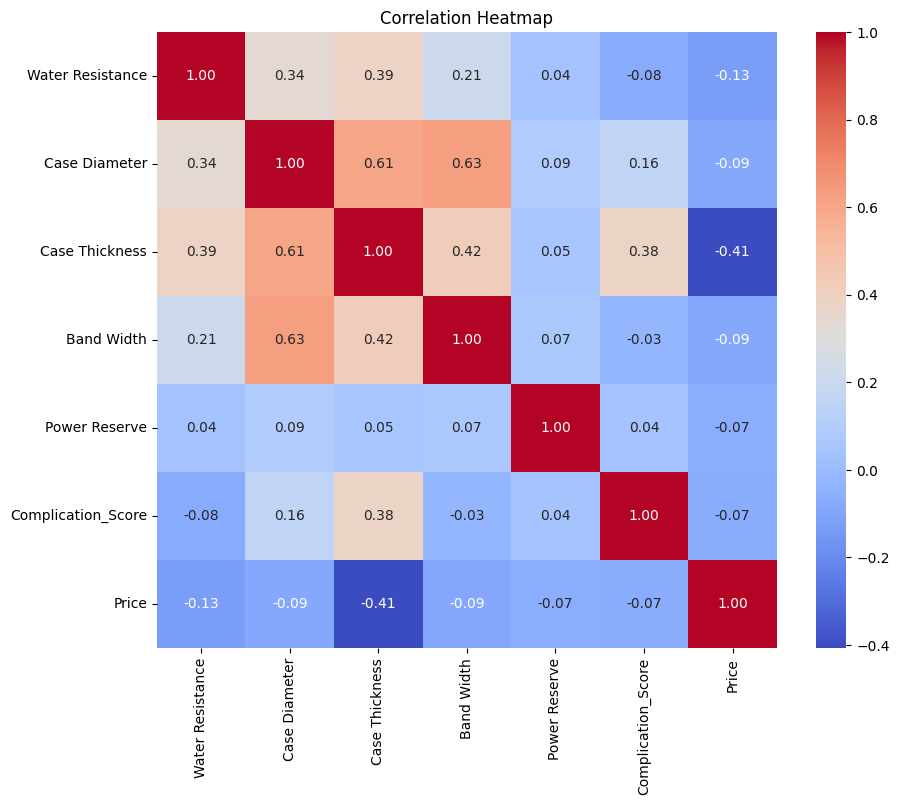

In [126]:
numeric_cols = ['Water Resistance', 'Case Diameter', 'Case Thickness',
                'Band Width', 'Power Reserve', 'Complication_Score', 'Price']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()